# Imports

In [18]:
import torch

import dlc_practical_prologue as dlc

torch.__version__

'1.0.1.post2'

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

# Data & Constants

In [6]:
N = 1000
print(f'size of training and test sets = {N}')

train_input, train_target, train_classes,\
test_input, test_target, test_class = dlc.generate_pair_sets(N)
print(f'shape is {train_input.shape}')

size of training and test sets = 1000
shape is torch.Size([1000, 2, 14, 14])


In [23]:
def show_img(img):
    plt.imshow(img)
    plt.show()

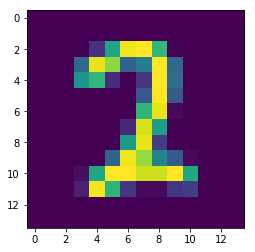

In [24]:
show_img(train_input[0, 0])

# Models